In [1]:
#importing the MNIST dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.special import softmax
#visualizing digits
import matplotlib.pyplot as plt
#numerical libaries
import numpy as np
import math
import scipy.special
#sys.getsizeof(myvar), ex. print(sys.getsizeof(training_data),sys.getsizeof(test_data))
import sys 

MNIST Classifier
  1. NEURAL NET FROM SCRATCH
  2. NEURAL NET WITH TORCH
  3. CONVOLUTIONAL NERUAL NET FROM SCRATCH
  4. CONVOUTIONAL NEUTAL NET WITH TORCH

In [2]:
#loading MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
X = X.reshape((X.shape[0],X.shape[1],1))
y = mnist.target.astype('int64')
#normalize digit array of 0-255 pixel values to range between 0 and 1
X /= 255.0
#create X training and test training data set with solutions y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

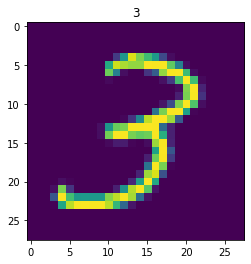

In [3]:
#visualize array to show digit
def plot_example(img, sol):
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.title(sol)
plot_example(X_train[0], y_train[0])

In [4]:
X_test[0].shape

(784, 1)

**1. NEURAL NET FROM SCRATCH**

In [5]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddenlayernodes, outputnodes):
        self.inputnodes = inputnodes
        self.hiddenlayernodes = hiddenlayernodes
        self.outputnodes = outputnodes
        # create layers
        self.W12=np.random.normal(0,0.5,size=(self.hiddenlayernodes,self.inputnodes)).astype('float64')
        self.B2 =np.random.normal(0,0.5,size=(self.hiddenlayernodes,1)).astype('float64')
        self.W23=np.random.normal(0,0.5,size=(self.outputnodes,self.hiddenlayernodes)).astype('float64')
        self.B3 =np.random.normal(0,0.5,size=(self.outputnodes,1)).astype('float64')
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    def dsigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    #def ReLU(self, x):
    #    return np.where(x > 0., x, x * 0.01)
    #def dReLU(self, x):
    #    return np.where(x > 0., 1., 0.01)
    #def softmax(self, x):
    #    e_x = np.exp(x-x.max())
    #    return e_x / np.sum(e_x)
    #def dsoftmax(self, x):
    #    softmax_vector = self.softmax(x) 
    #    return np.diagflat(softmax_vector) - np.matmul(softmax_vector, softmax_vector.T)
    def getsolutionvector(self, scalar):
        y = np.zeros((self.outputnodes,1)).astype('float64')
        y[scalar] = 1
        return y
    def feedforward(self, a1):
        a2 = self.sigmoid(np.matmul(self.W12, a1) + self.B2)
        a3 = self.sigmoid(np.matmul(self.W23, a2) + self.B3)
        return a3
    def backpropagation(self, a1, sol, alpha):
        y = self.getsolutionvector(sol)
        z2 = np.matmul(self.W12, a1) + self.B2
        a2 = self.sigmoid(z2)
        z3 = np.matmul(self.W23, a2) + self.B3
        a3 = self.sigmoid(z3)

        #biasgradient23 = np.matmul(self.dsoftmax(z3), 2 * (a3-y))
        biasgradient23 = self.dsigmoid(z3) * 2 * (a3-y)
        self.B3 -= biasgradient23 * alpha
        self.W23 -= np.matmul(biasgradient23, a2.T) * alpha

        biasgradient12 = self.dsigmoid(z2) * np.matmul(self.W23.T, biasgradient23)
        self.B2 -= biasgradient12 * alpha
        self.W12 -= np.matmul(biasgradient12, a1.T) * alpha
    def train(self, epoch, alpha):
        print("Epoch: 0")
        self.classify_accuracy()
        for training in range(epoch):
            n = len(X_train)-1
            for i in range(n):
              brain.backpropagation(X_train[i], y_train[i], alpha)
            print("Epoch: "+str(training+1))
            self.classify_accuracy()
    def predict(self, inputvector):
        output = self.feedforward(inputvector)
        return np.argmax(output,axis=0)
    def classify_accuracy(self):
        n = len(X_test)-1
        correct = 0
        for i in range(n):
            guess = brain.predict(X_test[i])
            if guess == y_test[i]:
                correct += 1
        accuracy = correct / n
        print("Accuracy = "+str(correct)+"/"+str(n)+"="+str(accuracy))

In [8]:
brain = NeuralNetwork(784,256,10)

In [10]:
brain.train(epoch=1, alpha=0.1)


Epoch: 0
Accuracy = 16950/17499=0.968626778673067
Epoch: 1
Accuracy = 16949/17499=0.9685696325504315


**2. NEURAL NET WITH TORCH**

In [13]:
pip install skorch


     |████████████████████████████████| 133kB 9.3MB/s 


In [14]:
#NN libary
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier #pip install skorch
from sklearn.metrics import accuracy_score
#importing the MNIST dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
#visualizing the digits
import matplotlib.pyplot as plt

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
#loading MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
#X = X.reshape((X.shape[0],X.shape[1],1))
y = mnist.target.astype('int64')
#normalize digit array of 0-255 pixel values to range between 0 and 1
X /= 255.0
#create X training and test training data set with solutions y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
class ClassifierModule(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [18]:
torch.manual_seed(0)

net = NeuralNetClassifier(ClassifierModule(784, 98, 10), max_epochs=20, lr=0.1, device=device)

In [25]:
net.fit(X_train, y_train);

Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.1683       0.9604        0.1281  1.2736
      2        0.1677       0.9626        0.1228  1.2925
      3        0.1645       0.9623        0.1226  1.2404
      4        0.1619       0.9633        0.1195  1.1904
      5        0.1593       0.9638        0.1181  1.3219
      6        0.1567       0.9642        0.1197  1.3177
      7        0.1532       0.9642        0.1158  1.3467
      8        0.1512       0.9644        0.1157  1.2584
      9        0.1479       0.9652        0.1136  1.2458
     10        0.1472       0.9650        0.1129  1.4510
     11        0.1474       0.9670        0.1121  1.3842
     12        0.1453       0.9669        0.1102  1.3652
     13        0.1420       0.9671        0.1088  1.2697
     14        0.1415       0.9662        0.1091  1.2549
     15        0.1412       0.9679        0.1067  1.2812
    

In [26]:
y_pred = net.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.9681714285714286

In [28]:
error_mask = y_pred != y_test

In [237]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

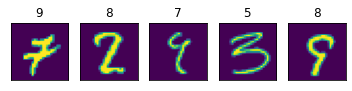

In [238]:
plot_example(X_test[error_mask], y_pred[error_mask])

**3. CONVOLUTIONAL NEURAL NET FROM SCRATCH**

In [305]:
import scipy.misc #example face image
from matplotlib import gridspec #larger plots

In [306]:
img = scipy.misc.face(gray=True)
#img = img/255.0

In [307]:
img.shape

(768, 1024)

In [308]:
img = img.reshape((1,768,1024))
kernel = np.array([[[0,0,0],
                    [1,1,1],
                    [-1,-1,-1]]])

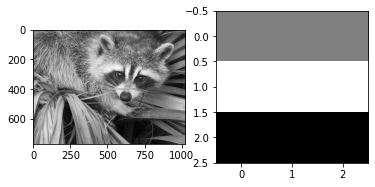

In [309]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img[0],cmap='gray')
f.add_subplot(1,2,2)
plt.imshow(kernel[0],cmap='gray')
plt.show();

In [310]:
img.shape, kernel.shape

((1, 768, 1024), (1, 3, 3))

In [342]:
def convolve(img, stackofkernel, padding, stride):
  """ inefficient implementation of Image Kernel Convolution """
  img_d, img_h, img_w = img.shape #depth (3 for rgb, 1 for grayscale), height, width
  ker_n, ker_h, ker_w = stackofkernel.shape # n amount of kernels, depth of each kernel, height of kernel, width of kernel
  convolve_h  = int( ( ( img_h - ker_h + (2*padding) ) / stride ) + 1 )
  convolve_w  = int( ( ( img_w - ker_w + (2*padding) ) / stride ) + 1 )
  convolve_img = np.zeros((ker_n, img_d, convolve_h, convolve_w)) # n new images, each having a depth (3 for rgb, etc or 1 for grayscale), height and width
  padded_img = np.pad(img, ((0,0),(padding,padding),(padding,padding)), mode='constant')
  def matrixdotproduct(n,z,y,x):
    # we assume that kernel height and width are equal. therefore, we are using only the width as a variable anymore
    # we also assume that the kernel size is alsways (odd number, same odd number)
    # (odd number, odd number) kernel -> -(oddnumber-1)/2 ... 0 ... (oddnumber-1)/2
    # concrete ex: (5,5) -> -2 ... 0 ... 2
    step = int( (ker_w-1)/2 )
    value = 0
    for i in range(-step,step+1,stride):
      for j in range(-step,step+1,stride):
        value += stackofkernel[n][i][j] * padded_img[z][y+padding+i][x+padding+j]
    return value
  for n in range(0, ker_n):
    for z in range(0, img_d):
      for y in range(0, convolve_h):
        for x in range(0, convolve_w):
          convolve_img[n][z][y][x] = matrixdotproduct(n,z,y,x)
  return convolve_img

In [353]:
img = img.reshape((1,768,1024))
kernelstack = np.array([
                          [   [0,0,0],
                              [0,1,0],
                              [0,0,0]
                          ],
                          [   [0,0,0],
                              [2,2,2],
                              [-1,-1,-1]
                          ],
                          [   [-1,2,0],
                              [-1,2,0],
                              [-1,2,0]
                          ],
                          [   [0,0,0],
                              [-1,-1,-1],
                              [2,2,2]
                          ],
                          [   [2,-1,0],
                              [2,-1,0],
                              [2,-1,0]
                          ],
                          [    
                              [-1,-1,-1],
                              [-1,8,-1],
                              [-1,-1,-1]
                          ],
                          [
                              [0,-1,0],
                              [-1,5,-1],
                              [0,-1,0]
                          ],
                          [
                              [1/9,1/9,1/9],
                              [1/9,1/9,1/9],
                              [1/9,1/9,1/9]
                          ],
                          [
                              [1/16,2/16,1/16],
                              [2/16,4/16,2/16],
                              [1/16,2/16,1/16]
                          ]
                        ])
new_img = convolve(img,kernelstack,1,1)

In [349]:
new_img.shape

(7, 1, 768, 1024)

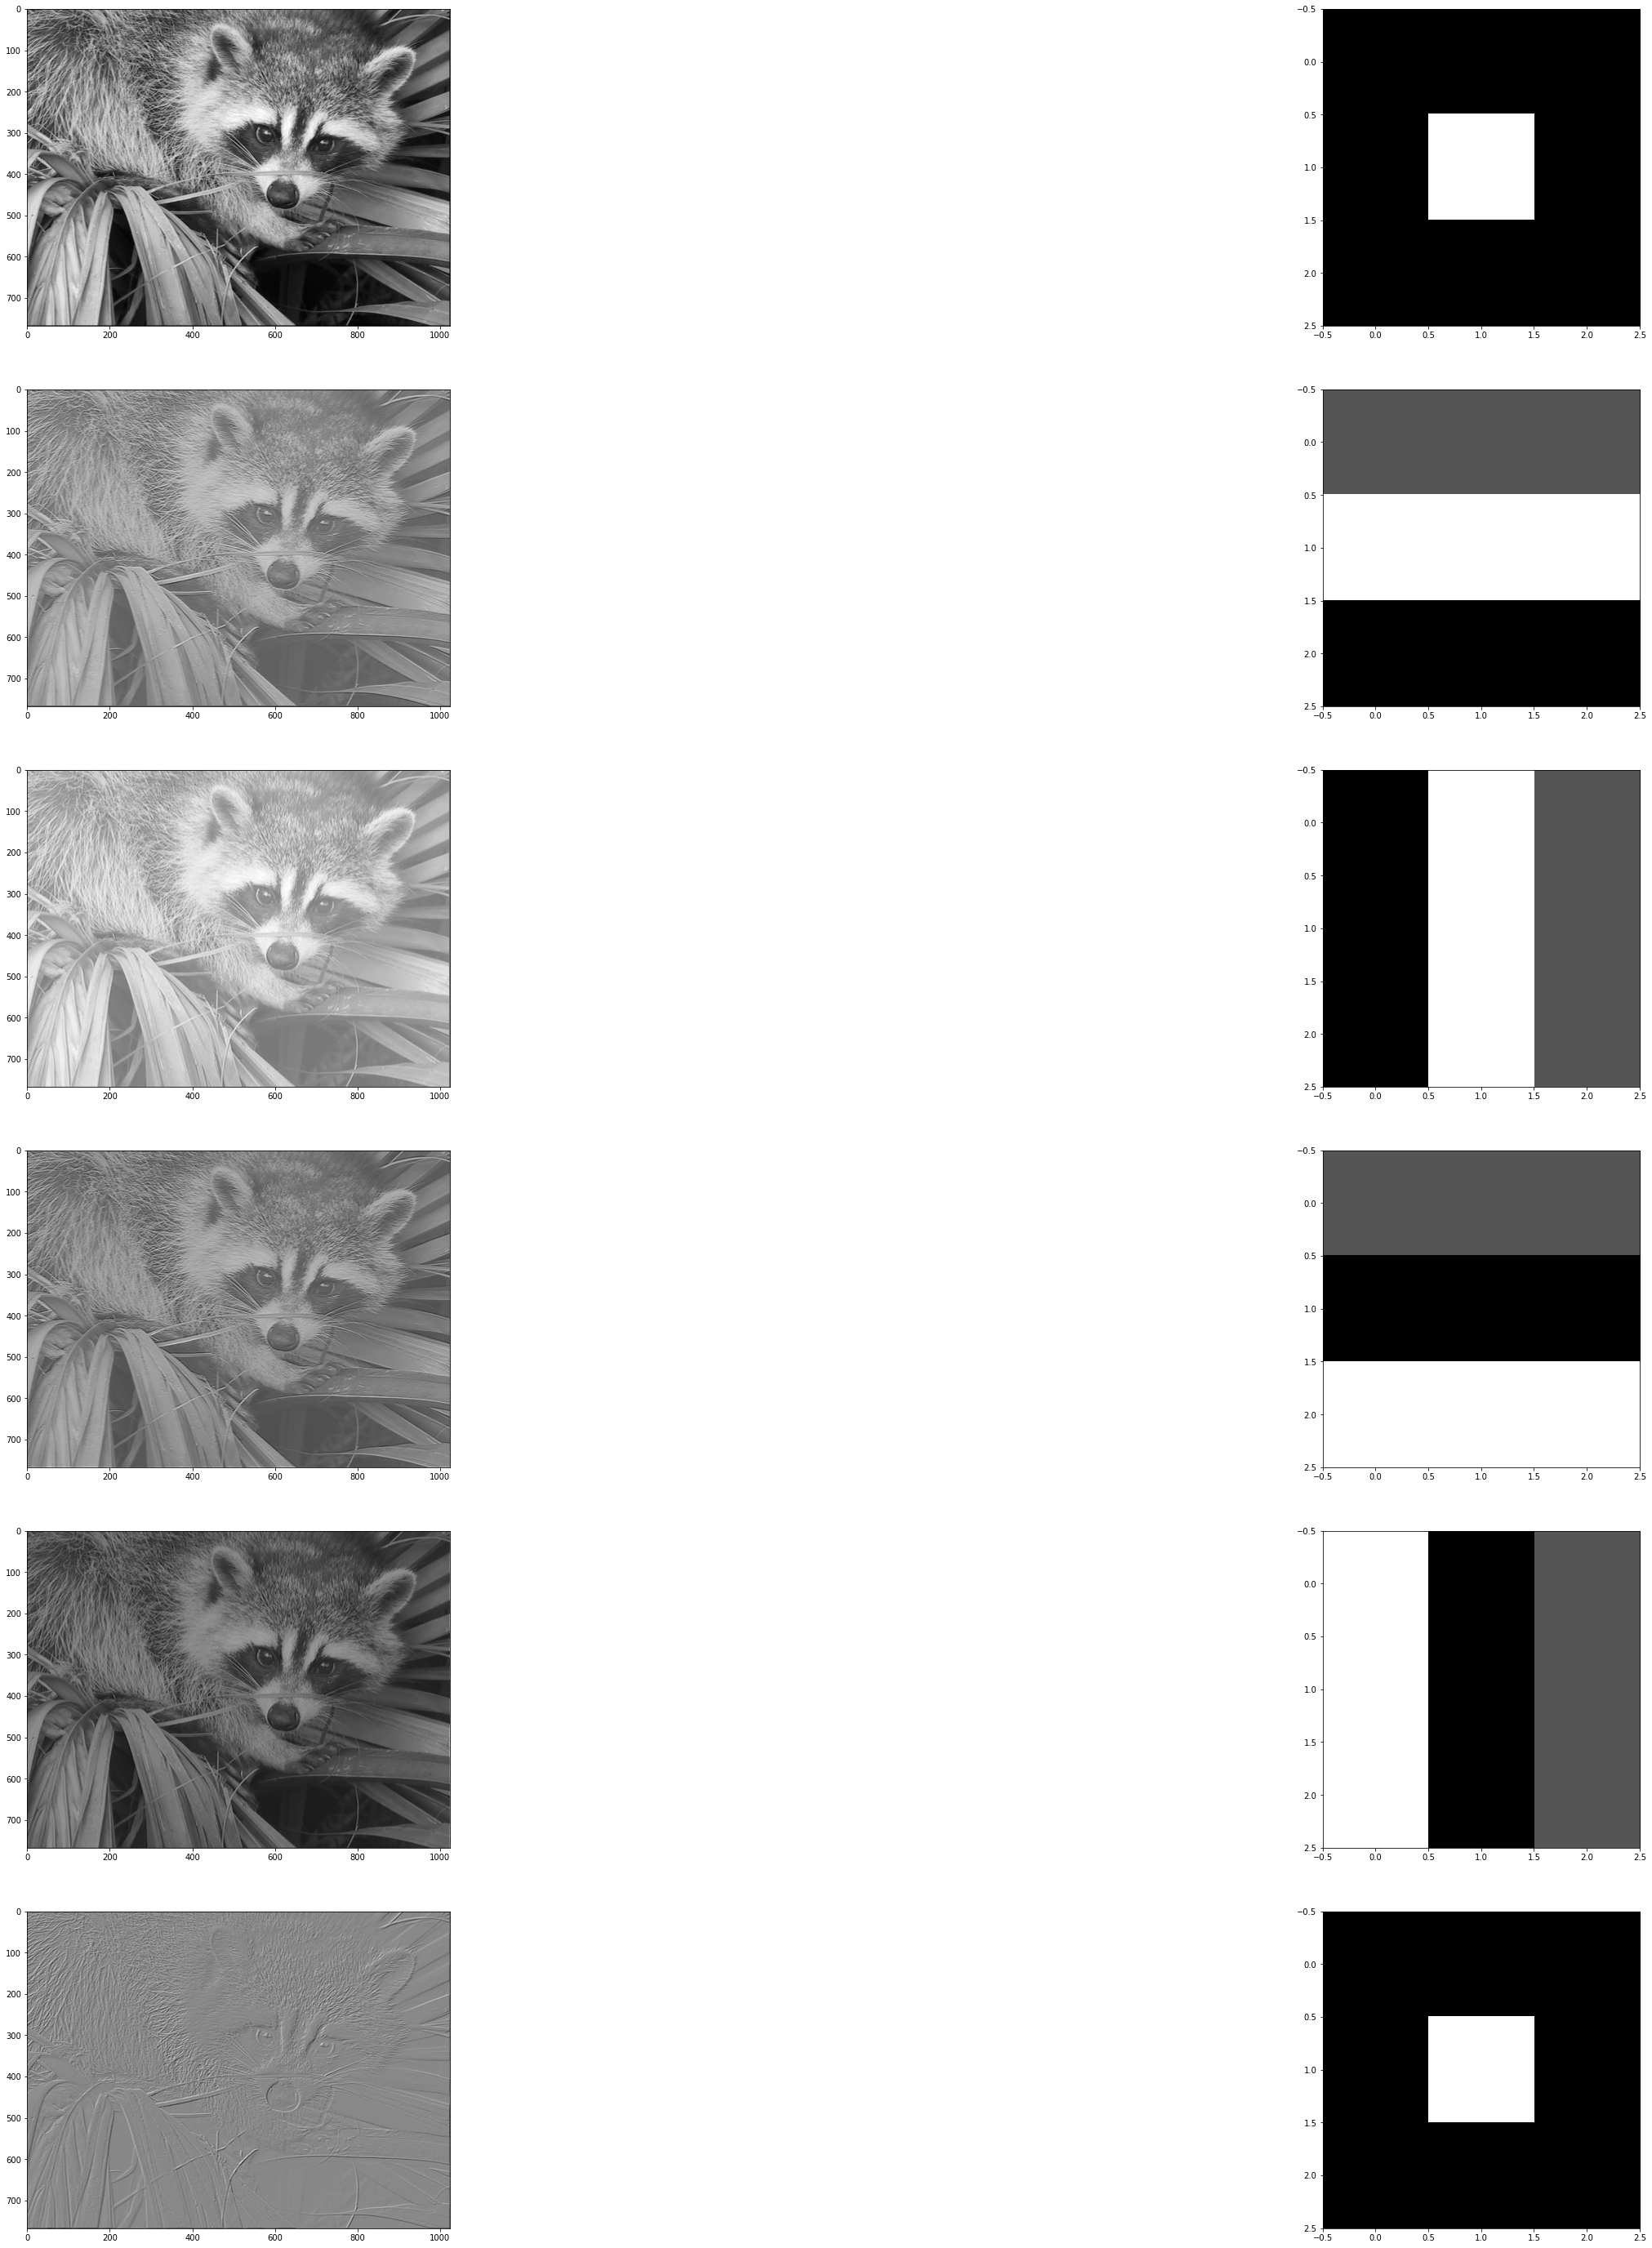

In [354]:
f = plt.figure(figsize=(50,50))

for i in range(6):
  f.add_subplot(6,2,(2*i)+1)
  plt.imshow(new_img[i][0],cmap='gray')
  f.add_subplot(6,2,(2*i)+2)
  plt.imshow(kernelstack[i],cmap='gray')
plt.show();


**4. CONVOLUTIONAL NEURAL NET WITH TORCH**

In [31]:
XCnn = X.reshape(-1, 1, 28, 28)

In [32]:
XCnn.shape

(70000, 1, 28, 28)

In [33]:
XCnn_train, XCnn_test, y_train, y_test = train_test_split(XCnn, y, test_size=0.25, random_state=42)

In [34]:
XCnn_train.shape, y_train.shape

((52500, 1, 28, 28), (52500,))

In [35]:
class Cnn(nn.Module):
    def __init__(self, dropout=0.5):
        super(Cnn, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d(p=dropout)
        self.fc1 = nn.Linear(1600, 100) # 1600 = number channels * width * height
        self.fc2 = nn.Linear(100, 10)
        self.fc1_drop = nn.Dropout(p=dropout)

    def forward(self, x):
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        
        # flatten over channel, height and width = 1600
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = torch.relu(self.fc1_drop(self.fc1(x)))
        x = torch.softmax(self.fc2(x), dim=-1)
        return x

In [37]:
torch.manual_seed(0)

cnn = NeuralNetClassifier(Cnn, max_epochs=5, lr=0.002, optimizer=torch.optim.Adam, device=device)

In [38]:
cnn.fit(XCnn_train, y_train);

  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        0.4342       0.9723        0.0897  28.3258
      2        0.1629       0.9788        0.0674  28.1678
      3        0.1293       0.9815        0.0583  28.5480
      4        0.1125       0.9841        0.0502  28.5585
      5        0.1000       0.9861        0.0472  28.4888


In [39]:
y_pred_cnn = cnn.predict(XCnn_test)

In [40]:
accuracy_score(y_test, y_pred_cnn)

0.9845142857142857

In [41]:
accuracy_score(y_test[error_mask], y_pred_cnn[error_mask])

0.651705565529623

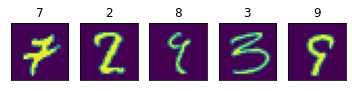

In [42]:
plot_example(X_test[error_mask], y_pred_cnn[error_mask])